In [32]:
import pandas as pd
import numpy as np
import csv
import xlrd
import openpyxl
from pathlib import Path
import datetime
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt
from mpld3 import plugins

In [33]:
#This is the data already cleaned in Step A. The full year table transaction data and unpivoted account data
acc = pd.read_excel('Clean_Data.xlsx', sheet_name= 'Account')
trans = pd.read_excel('Clean_Data.xlsx', sheet_name = 'Transactions')

## Heat Map of expenses by month


In [34]:
trans

,month,category,group,flow,actual,budget,monthnum,diff
0,Apr,Alcohol,Leisure,Out,-86.08,-50.0,4,36.08
1,Apr,BB Income,Income,In,20.00,100.0,4,-80.00
2,Apr,Car,Leisure,Out,-203.94,-450.0,4,-246.06
3,Apr,Cellphone,Housing,Out,-168.68,-50.0,4,118.68
4,Apr,Clothes,Living,Out,-204.54,-200.0,4,4.54
...,...,...,...,...,...,...,...,...
212,Jul,Public Transportation,Leisure,Out,0.00,-20.0,7,-20.00
213,Jul,Special Splurge,Leisure,Out,0.00,0.0,7,0.00
214,Jul,Income Taxes,Living,Out,0.00,0.0,7,0.00
215,Jul,Viv's Choice,Leisure,Out,0.00,-70.0,7,-70.00


In [35]:
trans.sort_values(by='monthnum',inplace = True)
trans['actual'] = trans['actual'].apply(lambda x: float('%.2f' % x)) #getting some weird number formatting. These lines fix that
trans['budget'] = trans['budget'].apply(lambda x: float('%.2f' % x))
trans['diff'] = trans['diff'].apply(lambda x: float('%.2f' % x))
trans

,month,category,group,flow,actual,budget,monthnum,diff
69,Jan,Transfer,Transfer,Transfer,-0.01,0.0,1,0.00
62,Jan,Other Income,Income,In,23.36,10.0,1,13.36
164,Jan,BB Income,Income,In,0.00,0.0,1,0.00
61,Jan,Interest Income,Income,In,0.06,0.0,1,0.06
60,Jan,Home Improvement,Housing,Out,-0.01,-50.0,1,-49.99
...,...,...,...,...,...,...,...,...
90,Jul,Viv's Cheque,Income,In,297.13,4400.0,7,-4102.87
91,Jul,Vivian Work Expense,Work,Out,-647.23,-100.0,7,547.23
215,Jul,Viv's Choice,Leisure,Out,0.00,-70.0,7,-70.00
77,Jul,Eating Out,Leisure,Out,-9.04,-150.0,7,-140.96


In [24]:
act_hm = trans.pivot_table(index = ['category','flow'], columns = 'monthnum', values = ['actual'])

In [25]:
act_hm

actual                                      \
monthnum                              1        2        3        4        5   
category              flow                                                    
Alcohol               Out        -54.88   -63.95     0.00   -86.08     0.00   
BB Income             In           0.00     0.00     0.00    20.00    70.00   
Car                   Out       -233.23  -202.55  -251.37  -203.94  -307.19   
Cellphone             Out       -116.86   -50.85   -93.49  -168.68   -96.05   
Clothes               Out        -93.36  -305.94   -28.46  -204.54  -434.56   
Eating Out            Out        -54.19     0.00   -51.86   -76.27  -118.13   
Fees                  Out         -0.01     0.00     0.00     0.00   -27.99   
Food & Supplies       Out       -786.69  -549.31  -776.05  -505.30  -414.38   
Fun & Dates           Out         -0.01   -95.31    -5.64     0.00     0.00   
Gifts                 Out        -89.26  -795.21   -33.00  -463.41     0.00   
God                   Out       -220.95  -552.94 -1064.94  -256.94  -839.94   
Health                Out        -24.09  -175.49   -66.35   -65.87 -1466.48   
Hobbies               Out        -69.59  -172.29    -5.53   -11.29     0.00   
Home Improvement      Out         -0.01     0.00  -117.33   -21.42     0.00   
Income Taxes          Out          0.00     0.00     0.00 -2272.14     0.00   
Interest Income       In           0.06     0.04     0.04     0.07     0.08   
Other Income          In          23.36    10.61    12.65    29.16    24.29   
Pay Credit Card       Transfer    -0.01     0.00     0.00     0.00     0.00   
Public Transportation Out         -0.01     0.00     0.00   -50.00     0.00   
Rent & Utilities      Out       -800.01  -650.00  -650.00  -650.00 -2900.00   
Saving                Out         17.11 -4400.00 -4317.55  -100.00   500.00   
Special Splurge       Out         -0.01     0.00     0.00     0.00     0.00   
Taxes Prepaid         Out          0.00  -200.00  -100.00  -100.00 -1919.00   
Timmy Work Expense    Out      -1979.45   -77.82  -107.80    -8.63   -68.82   
Timmy's Cheque        In        3708.50  3708.50  4013.55  3759.24  3807.47   
Timmy's Choice        Out         -0.01     0.00  -191.46     0.00  -173.90   
Transfer              Transfer    -0.01     0.00   -60.00     0.00     0.00   
Travel                Out        -22.33  -224.18     0.00     0.00     0.00   
Viv's Cheque          In        1847.47  2263.47  2417.64  2579.09  2345.57   
Viv's Choice          Out         -0.01     0.00  -103.96     0.00   -58.76   
Vivian Work Expense   Out          0.00     0.00  -239.54     0.00     0.00   

                                                  
monthnum                              6        7  
category              flow                        
Alcohol               Out        -55.80     0.00  
BB Income             In         175.00     0.00  
Car                   Out      -2404.42    -1.18  
Cellphone             Out        -92.65     0.00  
Clothes               Out       -131.86  -407.15  
Eating Out            Out       -129.73    -9.04  
Fees                  Out          0.00     0.00  
Food & Supplies       Out       -468.01  -264.44  
Fun & Dates           Out          0.00     0.00  
Gifts                 Out       -465.42     0.00  
God                   Out       -346.94  -256.94  
Health                Out       -123.81   -49.10  
Hobbies               Out       -302.85  -160.41  
Home Improvement      Out       -120.28    40.71  
Income Taxes          Out          0.00     0.00  
Interest Income       In           0.05     0.00  
Other Income          In          57.40     0.00  
Pay Credit Card       Transfer   -98.52   118.52  
Public Transportation Out        -92.00     0.00  
Rent & Utilities      Out       -796.06 -1317.52  
Saving                Out       1300.00  1900.00  
Special Splurge       Out      -3822.56     0.00  
Taxes Prepaid         Out      -1300.00  -700.00  
Timmy Work Expense  

In [26]:
months = {1: "Jan", 2: "Feb", 3: "Mar",4: "Apr",5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11:"Nov", 12:"Dec"}
act_hm.rename(months, axis = 'columns')

actual                                      \
monthnum                            Jan      Feb      Mar      Apr      May   
category              flow                                                    
Alcohol               Out        -54.88   -63.95     0.00   -86.08     0.00   
BB Income             In           0.00     0.00     0.00    20.00    70.00   
Car                   Out       -233.23  -202.55  -251.37  -203.94  -307.19   
Cellphone             Out       -116.86   -50.85   -93.49  -168.68   -96.05   
Clothes               Out        -93.36  -305.94   -28.46  -204.54  -434.56   
Eating Out            Out        -54.19     0.00   -51.86   -76.27  -118.13   
Fees                  Out         -0.01     0.00     0.00     0.00   -27.99   
Food & Supplies       Out       -786.69  -549.31  -776.05  -505.30  -414.38   
Fun & Dates           Out         -0.01   -95.31    -5.64     0.00     0.00   
Gifts                 Out        -89.26  -795.21   -33.00  -463.41     0.00   
God                   Out       -220.95  -552.94 -1064.94  -256.94  -839.94   
Health                Out        -24.09  -175.49   -66.35   -65.87 -1466.48   
Hobbies               Out        -69.59  -172.29    -5.53   -11.29     0.00   
Home Improvement      Out         -0.01     0.00  -117.33   -21.42     0.00   
Income Taxes          Out          0.00     0.00     0.00 -2272.14     0.00   
Interest Income       In           0.06     0.04     0.04     0.07     0.08   
Other Income          In          23.36    10.61    12.65    29.16    24.29   
Pay Credit Card       Transfer    -0.01     0.00     0.00     0.00     0.00   
Public Transportation Out         -0.01     0.00     0.00   -50.00     0.00   
Rent & Utilities      Out       -800.01  -650.00  -650.00  -650.00 -2900.00   
Saving                Out         17.11 -4400.00 -4317.55  -100.00   500.00   
Special Splurge       Out         -0.01     0.00     0.00     0.00     0.00   
Taxes Prepaid         Out          0.00  -200.00  -100.00  -100.00 -1919.00   
Timmy Work Expense    Out      -1979.45   -77.82  -107.80    -8.63   -68.82   
Timmy's Cheque        In        3708.50  3708.50  4013.55  3759.24  3807.47   
Timmy's Choice        Out         -0.01     0.00  -191.46     0.00  -173.90   
Transfer              Transfer    -0.01     0.00   -60.00     0.00     0.00   
Travel                Out        -22.33  -224.18     0.00     0.00     0.00   
Viv's Cheque          In        1847.47  2263.47  2417.64  2579.09  2345.57   
Viv's Choice          Out         -0.01     0.00  -103.96     0.00   -58.76   
Vivian Work Expense   Out          0.00     0.00  -239.54     0.00     0.00   

                                                  
monthnum                            Jun      Jul  
category              flow                        
Alcohol               Out        -55.80     0.00  
BB Income             In         175.00     0.00  
Car                   Out      -2404.42    -1.18  
Cellphone             Out        -92.65     0.00  
Clothes               Out       -131.86  -407.15  
Eating Out            Out       -129.73    -9.04  
Fees                  Out          0.00     0.00  
Food & Supplies       Out       -468.01  -264.44  
Fun & Dates           Out          0.00     0.00  
Gifts                 Out       -465.42     0.00  
God                   Out       -346.94  -256.94  
Health                Out       -123.81   -49.10  
Hobbies               Out       -302.85  -160.41  
Home Improvement      Out       -120.28    40.71  
Income Taxes          Out          0.00     0.00  
Interest Income       In           0.05     0.00  
Other Income          In          57.40     0.00  
Pay Credit Card       Transfer   -98.52   118.52  
Public Transportation Out        -92.00     0.00  
Rent & Utilities      Out       -796.06 -1317.52  
Saving                Out       1300.00  1900.00  
Special Splurge       Out      -3822.56     0.00  
Taxes Prepaid         Out      -1300.00  -700.00  
Timmy Work Expense  

## split transactions into months

In [27]:
out_flow = trans[trans['flow'] == 'Out']
in_flow = trans[trans['flow'] == 'In']

In [28]:
in_flow

,month,category,group,flow,actual,budget,monthnum,diff
62,Jan,Other Income,Income,In,23.36,10.00,1,13.36
164,Jan,BB Income,Income,In,0.00,0.00,1,0.00
61,Jan,Interest Income,Income,In,0.06,0.00,1,0.06
67,Jan,Timmy's Cheque,Income,In,3708.50,3258.00,1,450.50
72,Jan,Viv's Cheque,Income,In,1847.47,2486.25,1,-638.78
46,Feb,Viv's Cheque,Income,In,2263.47,2350.00,2,-86.53
168,Feb,BB Income,Income,In,0.00,0.00,2,0.00
42,Feb,Timmy's Cheque,Income,In,3708.50,3700.00,2,8.50
37,Feb,Interest Income,Income,In,0.04,0.00,2,0.04
38,Feb,Other Income,Income,In,10.61,10.00,2,0.61


In [29]:
sum(in_flow['month'].isin(['Jan']))

5

In [31]:
#This block creates a different data frame for each month and each flow (in vs out), 
#comparing the actual, budget and difference for each category
#Then it writes it to a xlsx

writer = pd.ExcelWriter('B-Output.xlsx', engine='xlsxwriter')
for flow in ['in','out']:
    for i in range(1,13):
        if sum(trans['month'].isin([months[i]])) > 0: #If we have a transaction in this month
            exec(months[i] + "_" + flow + " = " + flow + "_flow["+ flow + "_flow['monthnum']=="+ (str(i))+ "]") #filter to table data
            exec(months[i] + "_"+flow + ".sort_values(by = ['flow','category'],inplace = True)") #Sort categories alhabetically
            #pivot table
            exec(months[i] + "_" + flow + "_pivot = "+ months[i] + "_" + flow + ".pivot_table(index = 'category', values = ['actual', 'budget','diff'])")
            exec(months[i] + "_" + flow + "_pivot.to_excel(writer,'" +months[i] + "_" + flow + "_pivot', index = True)") #write pivot table to xlsx
writer.save()

<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
writer = pd.ExcelWriter('B-Output.xlsx', engine='xlsxwriter')
Jan_in_pivot.to_excel(writer, "Jan_in_pivot", index = False)
writer.save()

In [14]:
len(Oct_in)

NameError: name 'Oct_in' is not defined

In [15]:
Feb_out_pivot

,actual,budget,diff
category,,,
Alcohol,-63.95,-50.0,13.95
Car,-202.55,-450.0,-247.45
Cellphone,-50.85,-85.0,-34.15
Clothes,-305.94,-150.0,155.94
Eating Out,0.00,-70.0,-70.00
Fees,0.00,0.0,0.00
Food & Supplies,-549.31,-550.0,-0.69
Fun & Dates,-95.31,-110.0,-14.69
Gifts,-795.21,-240.0,555.21


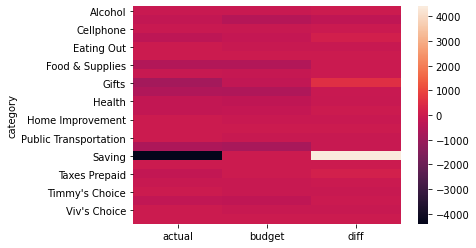

In [20]:
sns.heatmap(Feb_out_pivot)

In [19]:
Feb_out_pivot

,actual,budget,diff
category,,,
Alcohol,-63.95,-50.0,13.95
Car,-202.55,-450.0,-247.45
Cellphone,-50.85,-85.0,-34.15
Clothes,-305.94,-150.0,155.94
Eating Out,0.00,-70.0,-70.00
Fees,0.00,0.0,0.00
Food & Supplies,-549.31,-550.0,-0.69
Fun & Dates,-95.31,-110.0,-14.69
Gifts,-795.21,-240.0,555.21


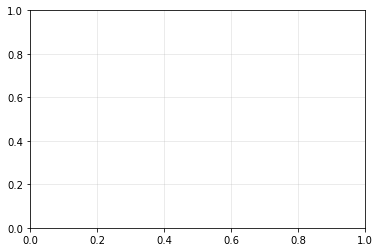

In [18]:

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)


for key, val in Feb_out_pivot.iteritems():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)
